In [1]:
import numpy as pd
import pandas as pd
import numpy as np
import re
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, precision_score, classification_report, ConfusionMatrixDisplay

In [2]:
#https://www.kaggle.com/datasets/adilimadeddinehosni/multi-resistance-antibiotic-susceptibility
data =pd.read_csv("bacteria/Bacteria_dataset_Multiresictance.csv")
data.head().transpose()

,0,1,2,3,4
ID,S290,S291,S292,S293,S294
Name,Elizabeth Lawrence,Tina Sanders,Erin Cooke,Mrs. Sharon Watson,Erika Stewart
Email,elizabeth.lawrence@example.com,tina.sanders@example.com,erin.cooke@example.com,mrs..sharon.watson@example.com,erika.stewart@example.com
Address,"6350 Robinson Loaf Apt. 447, Paulfurt, RI 30252","78594 Galloway Port Suite 762, South Tanyatown...","76661 Isaiah Manors, North Benjamin, HI 85195","1670 Thompson Way Apt. 520, Andrewbury, IL 11534","76838 Patrick Green Suite 538, Torresmouth, ME..."
age/gender,37/F,29/F,77/F,NaN,13/F
Souches,S290 Escherichia coli,S291 Morganella morganii,S292 Proteus mirabilis,NaN,S294 Escherichia coli
Diabetes,No,True,True,NaN,No
Hypertension,No,No,No,NaN,Yes
Hospital_before,No,No,No,NaN,No
Infection_Freq,0.0,3.0,3.0,NaN,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 10710 non-null  object
 1   Name               10710 non-null  object
 2   Email              10710 non-null  object
 3   Address            10710 non-null  object
 4   age/gender         10089 non-null  object
 5   Souches            10070 non-null  object
 6   Diabetes           10075 non-null  object
 7   Hypertension       10080 non-null  object
 8   Hospital_before    10073 non-null  object
 9   Infection_Freq     10071 non-null  object
 10  AMX/AMP            10052 non-null  object
 11  AMC                10078 non-null  object
 12  CZ                 10082 non-null  object
 13  FOX                10085 non-null  object
 14  CTX/CRO            10086 non-null  object
 15  IPM                10077 non-null  object
 16  GEN                10067 non-null  objec

In [4]:
data.isna().sum().sort_values()

ID                     0
Name                   0
Email                  0
Address                0
Notes                112
ofx                  618
age/gender           621
Acide nalidixique    622
CTX/CRO              624
FOX                  625
AN                   628
CZ                   628
C                    629
Hypertension         630
AMC                  632
IPM                  633
CIP                  633
Diabetes             635
colistine            636
Hospital_before      637
Furanes              637
Infection_Freq       639
Co-trimoxazole       640
Souches              640
GEN                  643
AMX/AMP              658
Collection_Date      669
dtype: int64

In [5]:
print(data.duplicated().sum())

0


In [6]:
data.columns

Index(['ID', 'Name', 'Email', 'Address', 'age/gender', 'Souches', 'Diabetes',
       'Hypertension', 'Hospital_before', 'Infection_Freq', 'AMX/AMP', 'AMC',
       'CZ', 'FOX', 'CTX/CRO', 'IPM', 'GEN', 'AN', 'Acide nalidixique', 'ofx',
       'CIP', 'C', 'Co-trimoxazole', 'Furanes', 'colistine', 'Collection_Date',
       'Notes'],
      dtype='object')

### Columns Informations
| Columns                 | Description |
| -------------------|----------------------|
| 🔑ID                 | An Unique Identifier |
|🖹Name               | patient Name |
|🖹Email              | Patient email |
|🖹Address            | Patient address |
|👤age/gender         | Combination of patient age and gender |
|🦠Souches            | Bacterial species name |
|🩺Diabetes           | Patient risk factor for diabetes |
|💓Hypertension       | Patient risk factor for hypertension |
|🏥 Hospital before    | Indicates if the patient had a prior hospital stay |
|📊 Infection_Freq     | Frequency of infections per patient |
|💊antibiotic family  | 'AMX/AMP', 'AMC', 'CZ', 'FOX', 'CTX/CRO', 'IPM', 'GEN', 'AN', 'Acide nalidixique', 'ofx','CIP', 'C', 'Co-trimoxazole','Furanes', 'colistine' |
|📅Collection_Date    | Date of bacterial isolate collection |
|📝 Notes              | Free-text field for additional comments |

In [7]:
df_cleaned = data.copy()

In [8]:
cols_to_drop = ["ID", "Notes", "Name", "Email", "Address"]
df_cleaned = df_cleaned.drop(cols_to_drop, axis=1)

In [9]:
def test(pattern:re.Pattern, ignore_na: bool=False):
    def _test(x):
        if ignore_na and x is np.nan:
            return False
        if isinstance(x, str):
            return pattern.fullmatch(x) is not None
        else:
            return False
    return _test

In [10]:
def create_mapper(mapper:dict):
    def _mapping(x):
        return mapper.get(x, x)
    return _mapping

In [11]:
def ignore_nan(fn, ignore_na: bool=True):
    def _ignore(x):
        if ignore_na and x is np.nan:
            return x
        else:
            return fn(x)
    return _ignore

In [12]:
pattern = re.compile(r"\d+\/(F|M)")
validation_result = df_cleaned["age/gender"].apply(test(pattern, ignore_na=True))
print(f"{(100 * validation_result.mean()):.2f}% of rows respect the expected format")

92.88% of rows respect the expected format


In [13]:
df_cleaned["age/gender"][~validation_result].value_counts()

age/gender
missing    84
?          58
Name: count, dtype: int64

In [14]:
mapper = {"missing": np.nan, "?": np.nan}
df_cleaned["age/gender"] = df_cleaned["age/gender"].apply(create_mapper(mapper))
#----
validation_result = df_cleaned["age/gender"].apply(test(pattern, ignore_na=True))
print(f"{(100 * validation_result.mean()):.2f}% of rows respect the expected format")

92.88% of rows respect the expected format


In [15]:
#validation_result = df_cleaned["age/gender"].apply(test(pattern, ignore_na=True))
#df_cleaned["age/gender"][~validation_result].value_counts()

In [16]:
df_cleaned["age"] = df_cleaned["age/gender"].apply(ignore_nan(lambda x : int(x.split("/")[0])))
df_cleaned["gender"] = df_cleaned["age/gender"].apply(ignore_nan(lambda x : x.split("/")[1]))

In [17]:
df_cleaned[["age", "gender"]].head()

,age,gender
0,37.0,F
1,29.0,F
2,77.0,F
3,NaN,NaN
4,13.0,F


In [18]:
#df_cleaned[["age", "gender"]] = df_cleaned["age/gender"].str.split("/", expand=True)

In [19]:
df_cleaned.drop("age/gender", axis=1, inplace=True)

In [20]:
df_cleaned.isna().sum()

Souches              640
Diabetes             635
Hypertension         630
Hospital_before      637
Infection_Freq       639
AMX/AMP              658
AMC                  632
CZ                   628
FOX                  625
CTX/CRO              624
IPM                  633
GEN                  643
AN                   628
Acide nalidixique    622
ofx                  618
CIP                  633
C                    629
Co-trimoxazole       640
Furanes              637
colistine            636
Collection_Date      669
age                  763
gender               763
dtype: int64

In [21]:
df_cleaned["gender"].value_counts(dropna=False)

gender
F      7929
M      2018
NaN     763
Name: count, dtype: int64

In [22]:
#Souches
pattern = re.compile(r"S(\d)+\s([A-Za-z0-9]|\s|\.)+")
validation_result = df_cleaned['Souches'].apply(test(pattern, ignore_na=True))
print(f"{(100 * validation_result.mean()):.2f}% of rows respect the expected format")

92.88% of rows respect the expected format


In [23]:
df_cleaned["Souches"][~validation_result].value_counts()

Souches
?          63
missing    60
Name: count, dtype: int64

In [24]:
def normalize_souche(x):
    if x is np.nan:
        return x
    elif x in ["?", "missing"]:
        return np.nan
    else:
        return x.split(" ")[1]

In [25]:
df_cleaned["Souches"] = df_cleaned["Souches"].apply(normalize_souche) 

In [26]:
df_cleaned["Souches"].value_counts(dropna=False)

Souches
Escherichia       4864
Enterobacteria     802
NaN                763
Proteus            598
Klebsiella         565
Citrobacter        481
E.coi              432
E.cli              396
E.                 391
Morganella         305
Serratia           256
Pseudomonas        200
Acinetobacter      181
Enter.bacteria     100
Enteobacteria       95
Klbsiella           74
Klebsie.lla         63
Protus              51
Proeus              47
Prot.eus            46
Name: count, dtype: int64

In [27]:
mapper = {
    "Escherichia" : "Escherichia"  ,
    "Enterobacteria" : "Enterobacteria",
    "Proteus" : "Proteus",
    "Klebsiella" : "Klebsiella",
    "Citrobacter" : "Citrobacter",
    "E.coi" : "E. coli",
    "E.cli" : "E. coli",
    "E." : "E. coli",
    "Morganella" : "Morganella",
    "Serratia" : "Serratia",
    "Pseudomonas" : "Pseudomonas",
    "Acinetobacter" : "Acinetobacter",
    "Enter.bacteria" : "Enterobacteria",
    "Enteobacteria" : "Enterobacteria",
    "Klbsiella" : "Klbsiella",
    "Klebsie.lla": "Klbsiella",
    "lebsie.lla" : "Klbsiella",
    "Protus" : "Proteus",
    "Proeus" : "Proteus",
    "Prot.eus": "Proteus"
}

In [28]:
df_cleaned["Souches"] = df_cleaned["Souches"].apply(create_mapper(mapper))

In [29]:
df_cleaned["Souches"].value_counts(dropna=False)

Souches
Escherichia       4864
E. coli           1219
Enterobacteria     997
NaN                763
Proteus            742
Klebsiella         565
Citrobacter        481
Morganella         305
Serratia           256
Pseudomonas        200
Acinetobacter      181
Klbsiella          137
Name: count, dtype: int64

In [30]:
df_cleaned["Diabetes"].value_counts(dropna=False)

Diabetes
No         7883
True       2064
NaN         635
?            64
missing      64
Name: count, dtype: int64

In [31]:
mapper = {"missing" : np.nan, "?" : np.nan}
df_cleaned["Diabetes"] = df_cleaned["Diabetes"].apply(create_mapper(mapper))

In [32]:
df_cleaned["Diabetes"].value_counts(dropna=False)

Diabetes
No      7883
True    2064
NaN      763
Name: count, dtype: int64

In [33]:
["Hypertension", "Diabetes"]

['Hypertension', 'Diabetes']

In [34]:
df_cleaned["Hypertension"].value_counts(dropna=False)

Hypertension
No         7470
Yes        2477
NaN         630
missing      73
?            60
Name: count, dtype: int64

In [35]:
df_cleaned["Hypertension"] = df_cleaned["Hypertension"].apply(create_mapper(mapper))

In [36]:
df_cleaned["Hypertension"].value_counts(dropna=False)

Hypertension
No     7470
Yes    2477
NaN     763
Name: count, dtype: int64

In [37]:
df_cleaned["Hospital_before"].value_counts(dropna=False)

Hospital_before
No         7008
Yes        2939
NaN         637
missing      64
?            62
Name: count, dtype: int64

In [38]:
df_cleaned["Hospital_before"] = df_cleaned["Hospital_before"].apply(create_mapper(mapper))

In [39]:
df_cleaned["Hospital_before"].value_counts(dropna=False)

Hospital_before
No     7008
Yes    2939
NaN     763
Name: count, dtype: int64

In [40]:
df_cleaned["Infection_Freq"].value_counts(dropna=False)

Infection_Freq
2.0        2966
1.0        2889
3.0        1963
0.0        1896
NaN         639
missing     131
unknown      81
error        81
?            64
Name: count, dtype: int64

In [41]:
mapper = {"missing": np.nan, "?": np.nan, "error":np.nan, "unknown": np.nan}

In [42]:
df_cleaned["Infection_Freq"] = df_cleaned["Infection_Freq"].apply(create_mapper(mapper))

In [43]:
df_cleaned["Infection_Freq"].value_counts(dropna=False)

Infection_Freq
2.0    2966
1.0    2889
3.0    1963
0.0    1896
NaN     996
Name: count, dtype: int64

In [44]:
antibiotic_columns = ["AMX/AMP", "AMC", "CZ", "FOX", "CTX/CRO", "IPM", "GEN", "AN",
    "Acide nalidixique", "ofx", "CIP", "C", "Co-trimoxazole", "Furanes", "colistine"]

In [45]:
val_found = {}
for var in antibiotic_columns:
    valori = df_cleaned[var].value_counts().to_dict()
    for key in valori:
        if key not in val_found:
            val_found[key] = valori[key]
        else:
            val_found[key] += valori[key]
print(val_found)

{'R': 46627, 'S': 97298, 's': 1449, 'i': 1335, 'Intermediate': 1337, 'r': 1309, 'missing': 889, '?': 920}


In [46]:
mapper = { "R": "Resistant", "S": "Susceptible", "s" : "Susceptible", 
           "i": "Intermediate", "Intermediate": "Intermediate", 
           "r": "Resistant", "missing" : np.nan, "?" : np.nan, } 

In [47]:
for var in antibiotic_columns:
    df_cleaned[var] = df_cleaned[var].apply(create_mapper(mapper))

In [48]:
df_cleaned["FOX"].value_counts(dropna=False)

FOX
Resistant       5735
Susceptible     4049
NaN              753
Intermediate     173
Name: count, dtype: int64

In [49]:
mois_fr = {
    "Jan": "01",
    "Fev": "02",
    "Fév": "02",
    "Mar": "03",
    "Avr": "04",
    "Mai": "05",
    "Juin": "06",
    "Juil": "07",
    "Aou": "08",
    "Aoû": "08",
    "Sep": "09",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12",
    "Déc": "12"
}

# Cleaning the Date

In [50]:
df_cleaned["Collection_Date"].value_counts(dropna=False) 

Collection_Date
2024-12-31    1461
2020-01-05    1337
08/05/2021     719
5 Fev 2025     712
05/01/2025     708
05/03/2022     696
2020-12-31     693
2023-12-31     693
01/05/2022     692
3 Jan 1019     684
NaN            669
?              603
missing        535
error          508
Name: count, dtype: int64

In [51]:
de = "08-05-2021"
de = de.split("-")
de.reverse()
print("-".join(de))

2021-05-08


In [52]:
pd.to_datetime(["2024-12-31", "2024-12-31", "?", "2023/12/30", "missing", "3 Jan 1019", "08-05-2021"], errors="coerce")

DatetimeIndex(['2024-12-31', '2024-12-31', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

In [53]:
def is_valid_date(date, fmt="%Y/%m/%d"):
    try:
        datetime.datetime.strptime(date, fmt)
    except:
        return False
    else:
        return True

In [54]:
def uniformize_date(i, mois_fr=mois_fr):
    if pd.isna(i):
        return np.nan
    
    i = str(i).strip() 
    if "/" in i:
        if is_valid_date(i):
            i = i.replace("/", "-")
            print(i)
            return datetime.datetime.strptime(i, "%Y-%m-%d").date()
        else:
            i = i.replace("/", "-")
            i = i.split("-")
            i = reversed(i)
            return datetime.datetime.strptime("-".join(i), "%Y-%m-%d").date()
    elif "-" in i:
        return datetime.datetime.strptime(i, "%Y-%m-%d").date()
    elif " " in i:
        i=i.replace(" ", "-")
        elt = i.split("-")[1]
        i=i.replace(elt, mois_fr[elt])
        i = i.split("-")
        i = reversed(i)
        return datetime.datetime.strptime("-".join(i), "%Y-%m-%d").date()
    else:
        return np.nan

In [55]:
#ui = pd.to_datetime(df_cleaned["Collection_Date"], errors="coerce")
df_cleaned["Collection_Date"] = df_cleaned["Collection_Date"].apply(uniformize_date)

In [56]:
df_cleaned["Collection_Date"].value_counts(dropna=False) 

Collection_Date
NaN           2315
2024-12-31    1461
2020-01-05    1337
2021-05-08     719
2025-02-05     712
2025-01-05     708
2022-03-05     696
2023-12-31     693
2020-12-31     693
2022-05-01     692
1019-01-03     684
Name: count, dtype: int64

In [57]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Souches            9947 non-null   object 
 1   Diabetes           9947 non-null   object 
 2   Hypertension       9947 non-null   object 
 3   Hospital_before    9947 non-null   object 
 4   Infection_Freq     9714 non-null   object 
 5   AMX/AMP            9957 non-null   object 
 6   AMC                9957 non-null   object 
 7   CZ                 9957 non-null   object 
 8   FOX                9957 non-null   object 
 9   CTX/CRO            9957 non-null   object 
 10  IPM                9957 non-null   object 
 11  GEN                9957 non-null   object 
 12  AN                 9957 non-null   object 
 13  Acide nalidixique  9957 non-null   object 
 14  ofx                9957 non-null   object 
 15  CIP                9957 non-null   object 
 16  C                  995

In [58]:
df_cleaned.isna().sum().sort_values(ascending=False)

Collection_Date      2315
Infection_Freq        996
Diabetes              763
Hypertension          763
Hospital_before       763
age                   763
Souches               763
gender                763
AMX/AMP               753
AMC                   753
CZ                    753
GEN                   753
FOX                   753
CTX/CRO               753
IPM                   753
ofx                   753
Acide nalidixique     753
AN                    753
CIP                   753
Furanes               753
Co-trimoxazole        753
C                     753
colistine             753
dtype: int64

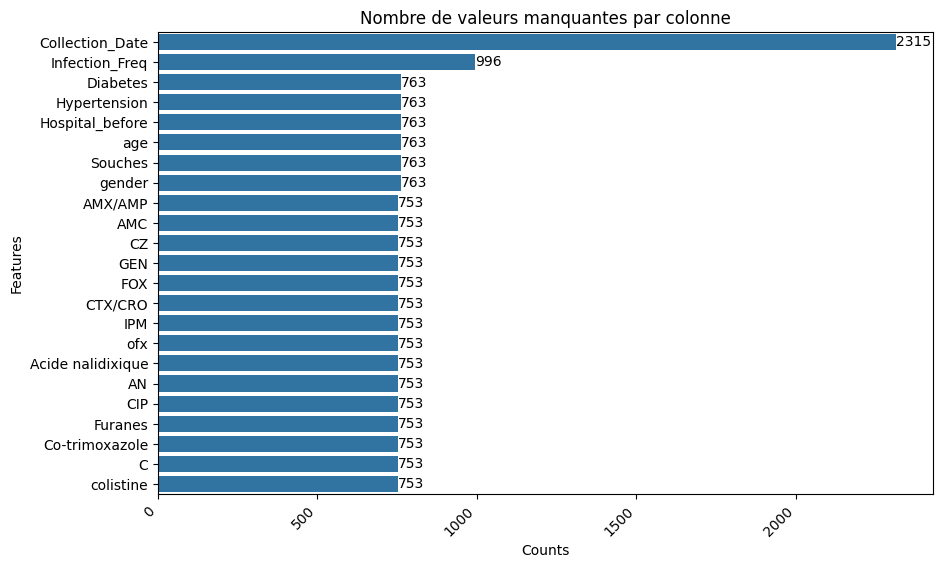

In [59]:
nan_df = df_cleaned.isna().sum().sort_values(ascending=False).reset_index()
nan_df.columns = ['Features', 'Counts']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=nan_df, x='Counts', y='Features')
plt.title("Nombre de valeurs manquantes par colonne")
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
_ = ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=10)
plt.show()

In [60]:
df_cleaned.isna().sum(axis=1).value_counts()

0     7784
1     2124
22     410
23     343
2       39
7        7
8        3
Name: count, dtype: int64

In [61]:
rows_to_drop = df_cleaned.index[df_cleaned.isna().sum(axis=1)>=5]
rows_to_drop

Index([    3,    14,    29,    31,    33,    35,    39,    56,    76,    80,
       ...
       10534, 10548, 10562, 10597, 10627, 10634, 10646, 10650, 10687, 10709],
      dtype='int64', length=763)

In [62]:
df_cleaned = df_cleaned.drop(index=rows_to_drop)

In [63]:
df_cleaned.shape

(9947, 23)

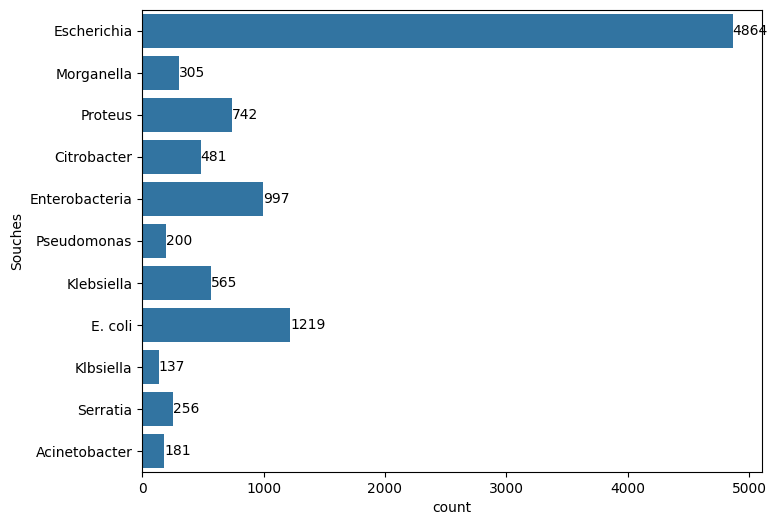

In [64]:
ax = sns.countplot(
    data = df_cleaned,
    y = "Souches"
)

ax.figure.set_size_inches(8, 6)
_ = ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=10)

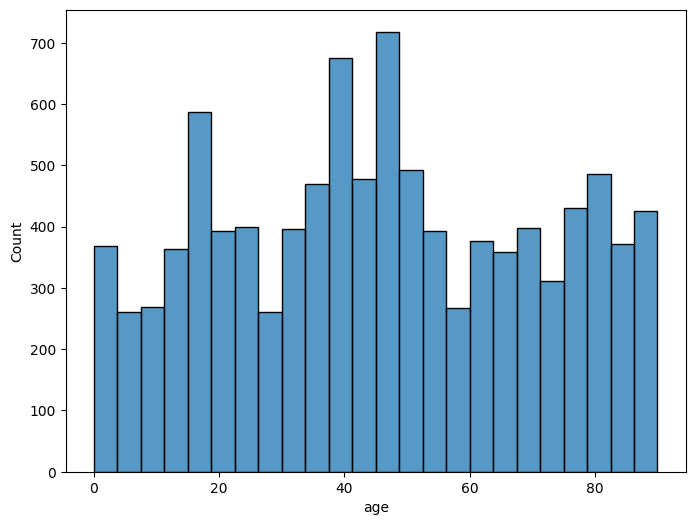

In [65]:
ax = sns.histplot(
    data = df_cleaned,
    x = "age"
)

_ = ax.figure.set_size_inches(8, 6)

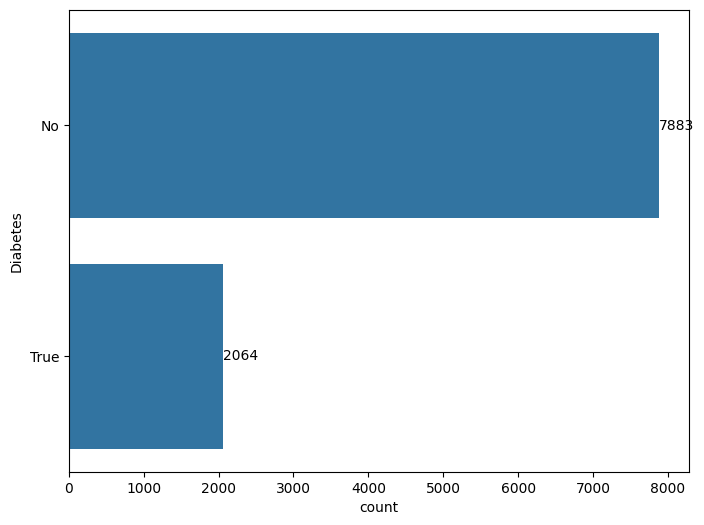

In [66]:
ax = sns.countplot(
    data = df_cleaned,
    y = "Diabetes"
)

ax.figure.set_size_inches(8, 6)
_ = ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=10)

In [67]:
df_cleaned.isna().sum()

Souches                 0
Diabetes                0
Hypertension            0
Hospital_before         0
Infection_Freq        233
AMX/AMP                 0
AMC                     0
CZ                      0
FOX                     0
CTX/CRO                 0
IPM                     0
GEN                     0
AN                      0
Acide nalidixique       0
ofx                     0
CIP                     0
C                       0
Co-trimoxazole          0
Furanes                 0
colistine               0
Collection_Date      1969
age                     0
gender                  0
dtype: int64

In [68]:
print(df_cleaned["Collection_Date"].head(10))
print(df_cleaned["Collection_Date"].dtype)

0     2025-02-05
1     2021-05-08
2     2022-05-01
4            NaN
5     2020-01-05
6     2020-12-31
7     2022-03-05
8     2025-01-05
9     2021-05-08
10    2023-12-31
Name: Collection_Date, dtype: object
object


In [69]:
df_cleaned["Collection_Date"].head()

0    2025-02-05
1    2021-05-08
2    2022-05-01
4           NaN
5    2020-01-05
Name: Collection_Date, dtype: object

In [70]:
target_date = datetime.date(1019, 1, 3)
ind = df_cleaned[df_cleaned["Collection_Date"] == target_date].index
print(ind)

Index([   15,    27,   116,   130,   152,   153,   155,   172,   174,   175,
       ...
       10514, 10583, 10590, 10596, 10601, 10613, 10616, 10628, 10630, 10632],
      dtype='int64', length=642)


In [71]:
new_date = datetime.date(2019, 1, 3)
if not ind.empty:
    df_cleaned.loc[ind, "Collection_Date"] = new_date
    print(f"Modification effectuée pour {len(ind)} lignes.")
else:
    print("Aucun indice trouvé, aucune modification effectuée.")

Modification effectuée pour 642 lignes.


In [72]:
if not ind.empty:
    df_cleaned.loc[ind, "Collection_Date"] = new_date
    print(f"Modification effectuée pour {len(ind)} lignes.")
else:
    print("Aucun indice trouvé, aucune modification effectuée.")

Modification effectuée pour 642 lignes.


In [73]:
df_cleaned["Collection_Date"].value_counts(dropna=False) 

Collection_Date
NaN           1969
2024-12-31    1389
2020-01-05    1260
2021-05-08     687
2025-02-05     680
2025-01-05     678
2023-12-31     663
2022-05-01     660
2020-12-31     660
2022-03-05     659
2019-01-03     642
Name: count, dtype: int64

In [74]:
df_cleaned["Infection_Freq"].value_counts()

Infection_Freq
2.0    2966
1.0    2889
3.0    1963
0.0    1896
Name: count, dtype: int64

In [75]:
df_cleaned["Year"] = pd.to_datetime(df_cleaned["Collection_Date"], format="%Y/%m/%d").dt.year
df_cleaned["Month"] = pd.to_datetime(df_cleaned["Collection_Date"], format="%Y/%m/%d").dt.month

In [76]:
df_cleaned[["age", "Month", "Year"]] = df_cleaned[["age", "Month", "Year"]].astype(dtype="Int64")

In [77]:
df_cleaned[ "Infection_Freq"] = df_cleaned[ "Infection_Freq"].astype(dtype="Float64")

In [78]:
df_cleaned.drop("Collection_Date", axis=1, inplace=True)

In [79]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9947 entries, 0 to 10708
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Souches            9947 non-null   object 
 1   Diabetes           9947 non-null   object 
 2   Hypertension       9947 non-null   object 
 3   Hospital_before    9947 non-null   object 
 4   Infection_Freq     9714 non-null   Float64
 5   AMX/AMP            9947 non-null   object 
 6   AMC                9947 non-null   object 
 7   CZ                 9947 non-null   object 
 8   FOX                9947 non-null   object 
 9   CTX/CRO            9947 non-null   object 
 10  IPM                9947 non-null   object 
 11  GEN                9947 non-null   object 
 12  AN                 9947 non-null   object 
 13  Acide nalidixique  9947 non-null   object 
 14  ofx                9947 non-null   object 
 15  CIP                9947 non-null   object 
 16  C                  9947 non-

In [80]:
df_cleaned[["age", "Month", "Year", "Infection_Freq"]].var()

age               619.593976
Month              22.489042
Year                4.067272
Infection_Freq      1.044426
dtype: Float64

In [81]:
target_col = "Souches"  # assure-toi du nom exact (respect majuscules / espaces)
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]

numerical_features = X.select_dtypes(["Int64", "Float64"]).columns.tolist()
categorical_features = X.select_dtypes(["object"]).columns.tolist()
print(numerical_features)

['Infection_Freq', 'age', 'Year', 'Month']


In [82]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Pipeline catégoriel : imputation + encodage One-Hot
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numerical_features),
        ("cat", cat_pipeline, categorical_features)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [83]:
print(categorical_features)

['Diabetes', 'Hypertension', 'Hospital_before', 'AMX/AMP', 'AMC', 'CZ', 'FOX', 'CTX/CRO', 'IPM', 'GEN', 'AN', 'Acide nalidixique', 'ofx', 'CIP', 'C', 'Co-trimoxazole', 'Furanes', 'colistine', 'gender']


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [85]:
y_train

6390      Escherichia
5038          Proteus
6366      Escherichia
1171    Acinetobacter
1561      Escherichia
            ...      
9717      Escherichia
6076      Escherichia
4969          E. coli
1867      Escherichia
4426      Escherichia
Name: Souches, Length: 6962, dtype: object

In [86]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [87]:
print(model.score(X_test, y_test))

0.49380234505862647


In [88]:
y_pred = model.predict(X_test)
y_pred[:10]

array(['Escherichia', 'Enterobacteria', 'Enterobacteria', 'Escherichia',
       'Escherichia', 'Escherichia', 'Morganella', 'Escherichia',
       'Escherichia', 'Escherichia'], dtype=object)

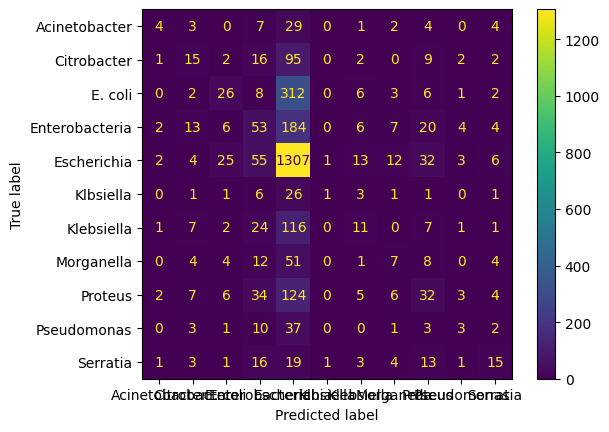

In [89]:
cm = confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, cmap="crest", annot=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [90]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

 Acinetobacter       0.31      0.07      0.12        54
   Citrobacter       0.24      0.10      0.15       144
       E. coli       0.35      0.07      0.12       366
Enterobacteria       0.22      0.18      0.20       299
   Escherichia       0.57      0.90      0.70      1460
     Klbsiella       0.33      0.02      0.05        41
    Klebsiella       0.22      0.06      0.10       170
    Morganella       0.16      0.08      0.10        91
       Proteus       0.24      0.14      0.18       223
   Pseudomonas       0.17      0.05      0.08        60
      Serratia       0.33      0.19      0.25        77

      accuracy                           0.49      2985
     macro avg       0.29      0.17      0.18      2985
  weighted avg       0.41      0.49      0.41      2985



In [91]:
y_test[:10]

8160       Pseudomonas
6380    Enterobacteria
1091    Enterobacteria
2975       Escherichia
4801       Escherichia
8614       Escherichia
1906        Morganella
8249        Klebsiella
3461           E. coli
8327          Serratia
Name: Souches, dtype: object